In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import handytools.visualizer as vis
import spectools.models.models as mdl
from IPython.display import clear_output
from spectools.models.calc import get_RF, get_RF_resnet
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper, get_drr_wrapper
from spectools.metrics.metrics import responsive, get_prs
from spectools.models.models import AN_layer, VGG16b_layer, ResNet18_layer

In [3]:
# params
xn = 227
lw = 1.5
fg = 1.0
bg = 0.0

In [10]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
sz_to_prs = {}
for sz in [30,50,70,90,110]:
    fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    fname1 = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    fname2 = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    R_fills = get_response_wrapper(hkeys, fill, fname1, mtype=mtype, device="cuda:0")
    R_outlines = get_response_wrapper(hkeys, outline, fname2, mtype=mtype, device="cuda:0")
    prs_foi, resp = get_prs(R_fills, R_outlines, hkeys, verbose=False)
    res = [prs_foi[hkey][resp[hkey]].mean() for hkey in hkeys]
    sz_to_prs[sz] = res
clear_output()

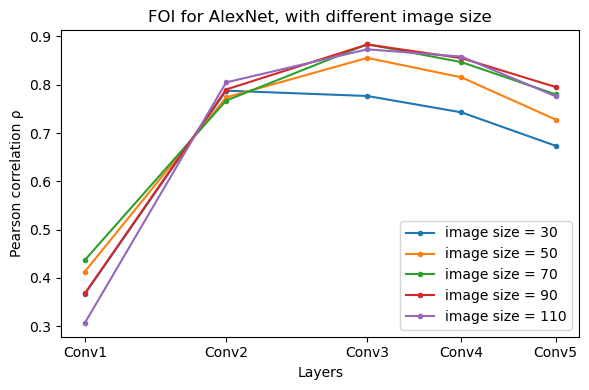

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
for sz in [30,50,70,90,110]:
    res = sz_to_prs[sz]
    ax.plot(hkeys, res, marker=".", linestyle="-", label=f"image size = {sz}")
    ax.set_xticks(hkeys)
    ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for AlexNet, with different image size")
plt.legend(); plt.tight_layout(); plt.show()

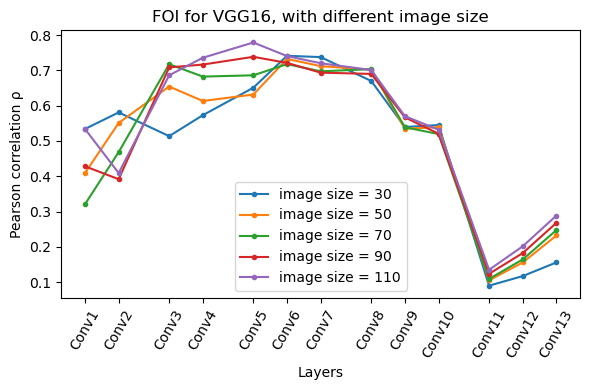

In [8]:
# params
ldic = VGG16b_layer
mtype = "VGG16"
hkeys = list(ldic.keys())

# fill stimulus
sz_to_prs = {}
for sz in [30,50,70,90,110]:
    fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    fname1 = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    fname2 = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    R_fills = get_response_wrapper(hkeys, fill, fname1, mtype=mtype, device="cuda:0")
    R_outlines = get_response_wrapper(hkeys, outline, fname2, mtype=mtype, device="cuda:0")
    prs_foi, resp = get_prs(R_fills, R_outlines, hkeys, verbose=False)
    res = [prs_foi[hkey][resp[hkey]].mean() for hkey in hkeys]
    sz_to_prs[sz] = res
clear_output()

fig, ax = plt.subplots(figsize=(6,4))
for sz in [30,50,70,90,110]:
    res = sz_to_prs[sz]
    ax.plot(hkeys, res, marker=".", linestyle="-", label=f"image size = {sz}")
ax.set_xticks(hkeys)
ax.set_xticklabels([ldic[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for VGG16, with different image size")
plt.legend(); plt.tight_layout(); plt.show()

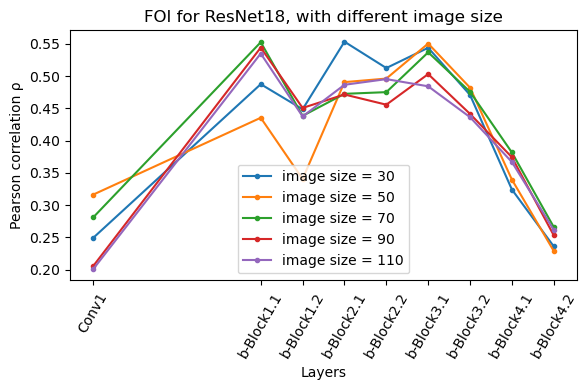

In [7]:
# params
ldic = ResNet18_layer
mtype = "ResNet18"
hkeys = list(ldic.keys())

# fill stimulus
sz_to_prs = {}
for sz in [30,50,70,90,110]:
    fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    fname1 = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    fname2 = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    R_fills = get_response_wrapper(hkeys, fill, fname1, mtype=mtype, device="cuda:0")
    R_outlines = get_response_wrapper(hkeys, outline, fname2, mtype=mtype, device="cuda:0")
    prs_foi, resp = get_prs(R_fills, R_outlines, hkeys, verbose=False)
    res = [prs_foi[hkey][resp[hkey]].mean() for hkey in hkeys]
    sz_to_prs[sz] = res
clear_output()

fig, ax = plt.subplots(figsize=(6,4))
for sz in [30,50,70,90,110]:
    res = sz_to_prs[sz]
    ax.plot(hkeys, res, marker=".", linestyle="-", label=f"image size = {sz}")
ax.set_xticks(hkeys)
ax.set_xticklabels([ldic[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for ResNet18, with different image size")
plt.legend(); plt.tight_layout(); plt.show()